This notebook explores various data visualization techniques with Python.

Date Created: 10 Feb 2018
<br>
Last Modified: 21 Feb 2018 
<br>
Humans Responsible: The Prickly Pythons

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# 2D

## Annotation
It's nice to be able to annotate a figure with lines, arrows and inset plots etc. to help the viewer understand the data better. Matplotlib's annotation module is able to do this.
<br>
For more information, have a look at these documentations:
<br>
https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.annotate.html
<br>
https://matplotlib.org/users/annotations_guide.html

In [3]:
from scipy.misc import imread

BG_img = imread("bird.png")

In [4]:
BG_img.shape # 4 channels: RGBA

(557, 800, 4)

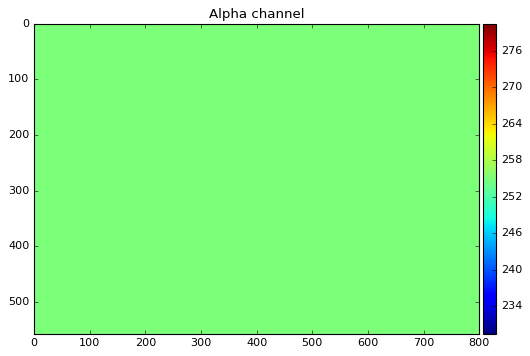

In [5]:
# Display one of the channels

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
im = ax.imshow(BG_img[:,:,3])
ax.set_title('Alpha channel')

from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='3%', pad=0.05)
cbar = plt.colorbar(im, cax=cax)

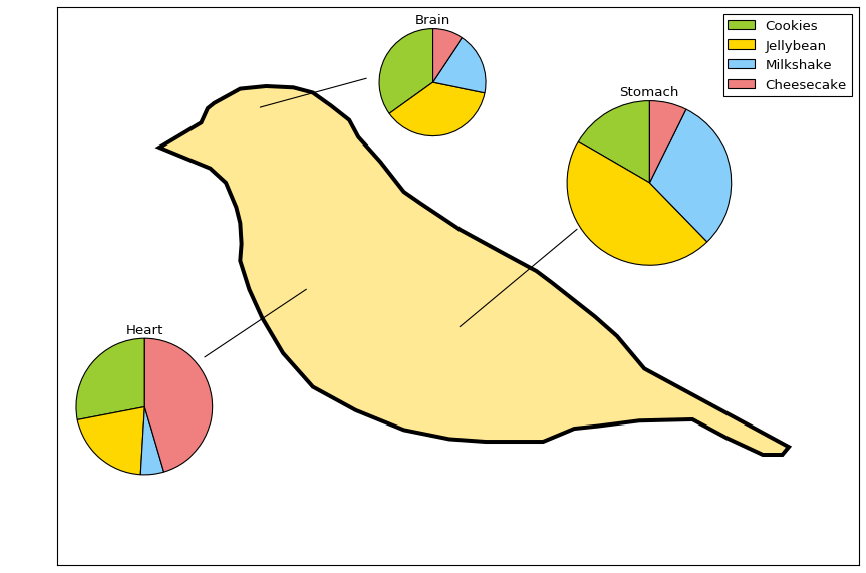

In [6]:
fig = plt.figure(figsize=(18,9))

labels = ['Cookies', 'Jellybean', 'Milkshake', 'Cheesecake']
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']

# Axis 1 - main figure
ax1 = fig.add_subplot(111)
im = ax1.imshow(BG_img, interpolation='nearest')
ax1.set_xticks([])
ax1.set_yticks([])


# Axis 2 - The first inset axis
ax2 = plt.axes([0.42, 0.72, 0.15, 0.15]) # First two numbers specify position, last two gives the size of the pie plot
proportions_Brain = [38.4, 40.6, 20.7, 10.3] # Proportions of the pie plot
patches, texts = plt.pie(proportions_Brain, colors=colors, shadow=False, startangle=90)
ax2.axis('equal')
ax2.set_title('Brain')
ax1.annotate('',                 \
             xy = (200, 100),    \
             xytext = (310, 70), \
             arrowprops = dict(arrowstyle='-', facecolor='black'))

# Axis 3 - The second inset axis
ax3 = plt.axes([0.2, 0.25, 0.19, 0.19]) # First two numbers specify position, last two gives the size of the pie plot
proportions_Heart = [61.7, 46.3, 12.1, 100.1] # Proportions of the pie plot
patches, texts = plt.pie(proportions_Heart, colors=colors, shadow=False, startangle=90)
ax3.axis('equal')
ax3.set_title('Heart')
ax1.annotate('',                  \
             xy = (250, 280),     \
             xytext = (145, 350), \
             arrowprops = dict(arrowstyle='-', facecolor='black'))

# Axis 4 - The third inset axis
ax4 = plt.axes([0.53, 0.54, 0.23, 0.23]) # First two numbers specify position, last two gives the size of the pie plot
proportions_stomach = [23.0, 63.2, 42.1, 10.1] # Proportions of the pie plot
patches, texts = plt.pie(proportions_stomach, colors=colors, shadow=False, startangle=90)
ax4.axis('equal')
ax4.set_title('Stomach')
ax1.annotate('',                  \
             xy = (400, 320),     \
             xytext = (520, 220), \
             arrowprops = dict(arrowstyle='-', facecolor='black'))


# Label the colors and display as legend - on axis number one.
ax1.legend(patches, labels, loc="best")

plt.show()

# 3D

## Mesh plots
Options to visualize data in 3D for Python include:
- matplotlib
- VTK
- mayavi

Here we show an example using matplotlib with the help of skimage's [marching cubes algorithm](http://scikit-image.org/docs/0.11.x/auto_examples/plot_marching_cubes.html?highlight=marching). 
The goal is to make an isosurface plot showing the 3D distribution of the electrons in the protein molecule Lysozyme obtained from the protein data bank (PDB) entry [1dpx](https://www.rcsb.org/structure/1dpx).



In [7]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from skimage import measure

### Read in data

In [8]:
protein = np.genfromtxt('1dpx_mod.pdb', skip_header=357, skip_footer=190, dtype=None,    \
                         names=['record name','atom_num','atom_type_detailed','residue', \
                                'chainID', 'resSeq', 'coord_x', 'coord_y', 'coord_z',    \
                                'occupancy', 'temperature factor', 'element'])

In [9]:
# Note the alphabetical letters in the data are treated as Byte objects rather than strings
# by the np.genfromtxt function because we've specified dtype=None.
protein['element'][0]

b'N'

In [10]:
b'N' == 'N'

False

In [11]:
b'N'.decode("utf-8") == 'N'

True

### Make space

In [12]:
x = np.arange(-25,25,1)
y = np.arange(0,40,1)
z = np.arange(0,40,1)

X,Y,Z = np.meshgrid(x,y,z)

In [13]:
X.shape

(40, 50, 40)

In [14]:
e_density_vol = np.zeros_like(X)
e_density_vol.shape

(40, 50, 40)

### Visualize the electron density of one atom

In [15]:
x = protein['coord_x'][0]
y = protein['coord_y'][0]
z = protein['coord_z'][0]
atom = protein['element'][0].decode("utf-8")

In [16]:
print('x = %.2f' % x)
print('y = %.2f' % y)
print('z = %.2f' % z)
print('atom is: %s' % atom)

x = 1.99
y = 9.13
z = 10.03
atom is: N


In [17]:
A = 7
gaussian_blob = np.exp(-((X-x)**2 + (Y-y)**2 + (Z-z)**2))
gaussian_blob = (gaussian_blob/np.max(gaussian_blob)) * A

In [18]:
gaussian_blob.shape

(40, 50, 40)

In [19]:
np.max(gaussian_blob)

7.0

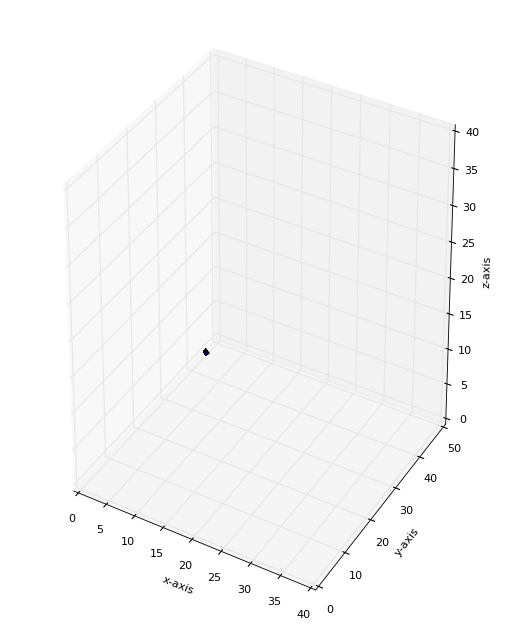

In [20]:
# Use marching cubes to obtain the surface mesh
isosurface_value = 5
verts, faces = measure.marching_cubes(gaussian_blob, isosurface_value)

# Display resulting triangular mesh using Matplotlib.
fig = plt.figure(figsize=(8, 10))
ax = fig.add_subplot(111, projection='3d')

# Fancy indexing: `verts[faces]` to generate a collection of triangles
mesh = Poly3DCollection(verts[faces])
ax.add_collection3d(mesh)

ax.set_xlabel("x-axis")
ax.set_ylabel("y-axis")
ax.set_zlabel("z-axis")

ax.set_xlim(0, 40)
ax.set_ylim(0, 50)
ax.set_zlim(0, 40)

plt.show()

### Visualize the electron density of whole protein

In [21]:
num_atoms = np.max(protein['atom_num'])

for i in range(num_atoms):
    x = protein['coord_x'][i]
    y = protein['coord_y'][i]
    z = protein['coord_z'][i]
    atom = protein['element'][i].decode("utf-8")
    
    if atom == 'C':
        A = 6
    elif atom == 'N':
        A = 7
    elif atom == 'O':
        A = 8
    elif atom == 'S':
        A = 16
    else:
        print("Atom not recognized.")
        break
        
    gaussian_blob = np.exp(-((X-x)**2 + (Y-y)**2 + (Z-z)**2))
    gaussian_blob = (gaussian_blob/np.max(gaussian_blob)) * A
    
    e_density_vol = e_density_vol + gaussian_blob 

<IPython.core.display.Javascript object>


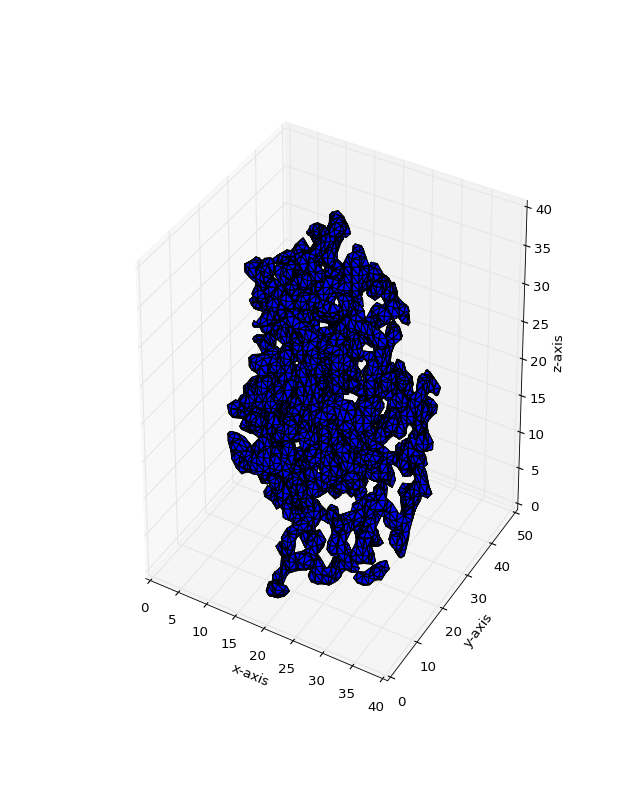

In [22]:
# Enable interactive plotting in the notebook
%matplotlib notebook

# Use marching cubes to obtain a surface mesh
isosurface_value = 5
verts, faces = measure.marching_cubes(e_density_vol, isosurface_value)

# Display resulting triangular mesh using Matplotlib
fig = plt.figure(figsize=(8, 10))
ax = fig.add_subplot(111, projection='3d')

# Fancy indexing: "verts[faces]" to generate a collection of triangles
mesh = Poly3DCollection(verts[faces])
ax.add_collection3d(mesh)

ax.set_xlabel("x-axis")
ax.set_ylabel("y-axis")
ax.set_zlabel("z-axis")

ax.set_xlim(0, 40)
ax.set_ylim(0, 50)
ax.set_zlim(0, 40)

plt.show()

# Towards 4D 
## Bringing in time
Adapted from an example given in:
<br>
https://brushingupscience.wordpress.com/2016/06/21/matplotlib-animations-the-easy-way/

In [23]:
%matplotlib inline

In [24]:
# Generate some data
x = np.linspace(-3, 3, 101)
t = np.linspace(1, 25, 26)
X, T = np.meshgrid(x, t)
 
sin_T = np.sin(2*np.pi*T/T.max())
F = sin_T * np.sinc(X*(1 + sin_T))

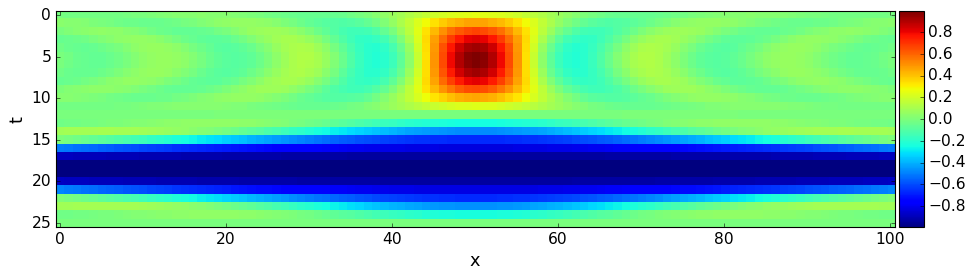

In [25]:
# Increase fontsize of x and y ticks
import matplotlib as mpl
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14

# Plot the figure
fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(111)
im = ax.imshow(F, interpolation='nearest')
ax.set_xlabel('x', fontsize=16)
ax.set_ylabel('t', fontsize=16)

# Make colorbar
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='3%', pad=0.05)
cbar = plt.colorbar(im, cax=cax)

plt.show()

In [26]:
%matplotlib notebook

from matplotlib.animation import FuncAnimation

<IPython.core.display.Javascript object>


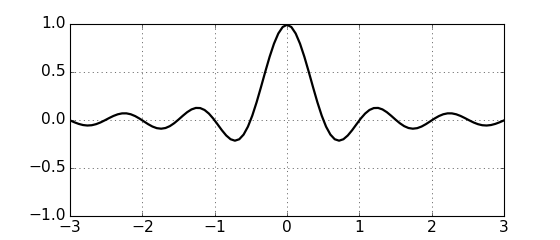

In [27]:
fig, ax = plt.subplots(figsize=(7, 3))
ax.set(xlim=(-3, 3), ylim=(-1, 1))
ax.grid()

line = ax.plot(x, F[0, :], color='k', lw=2)[0]

def animate(i):
    line.set_ydata(F[i, :])
    
anim = FuncAnimation(fig, animate, interval=100, frames=len(t)-1)